# **Evaluating the Performance of the Federated Learning Models**

In [1]:
import json

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
NUM_MEAS = 5
TRAINING_DAYS = 4
SHARING_METHODS = ["ref", "all_data", "alters", "zopt"]
SHARING_METHODS_NAMES = ["reference", "all data", "alters", "zopt"]

In [3]:
FL_ROOT = "../../02_data/04_fl_performance/broad/"

In [4]:
sharing_methods, days, performances = [], [], []

for sm in SHARING_METHODS:
    for mc in range(NUM_MEAS):
        with open(f"{FL_ROOT}/{mc}/{sm}/fl_eval_performance.json") as f:
            eval_results = json.load(f)["fl_performance"]
            for day in range(len(eval_results)):
                sharing_methods.append(SHARING_METHODS_NAMES[SHARING_METHODS.index(sm)])
                days.append(day)
                performances.append(eval_results[day]["evaluation_result"])
                
fl_perf = pd.DataFrame()
fl_perf["sharing_method"] = sharing_methods
fl_perf["day"] = days
fl_perf["performances"] = performances

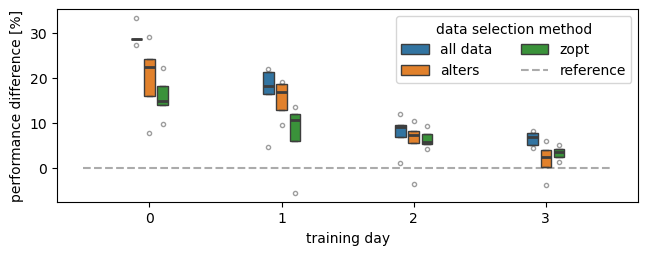

In [8]:
#calculation:
#reference:
ref_day = {}
ref_df = fl_perf[fl_perf["sharing_method"]=="reference"]
for day in range(4):
    avg = ref_df[ref_df["day"] == day]["performances"].mean()
    ref_day[day] = avg
#comparison:
diffs = []
for i,r in fl_perf.iterrows():
    diffs.append((ref_day[r["day"]] - r["performances"])/ref_day[r["day"]]*100)
fl_perf["difference_to_ref"] = diffs

#plotting:
plt.figure(figsize=(7.5, 2.5))
sns.boxplot(fl_perf[fl_perf["sharing_method"] != "reference"], x="day", y="difference_to_ref", hue="sharing_method",
            width=0.3, gap=0.2, whis=[1,99], fliersize=3.0,
            flierprops={"alpha": 0.5},
            medianprops={"linewidth":2})
plt.hlines(y=0, xmin=-0.5, xmax=3.5, zorder=0, linestyle="--", color="k", alpha=0.33, label="reference")
plt.xlabel("training day")
plt.ylabel("performance difference [%]")
plt.legend(title="data selection method", ncols=2, loc="best",)# bbox_to_anchor=(.41, -.35))

In [9]:
fl_perf.groupby(["sharing_method", "day"]).mean()

performances  difference_to_ref
sharing_method day                                 
all data       0        0.061441       2.921679e+01
               1        0.054417       1.646817e+01
               2        0.051211       7.711926e+00
               3        0.048212       6.491171e+00
alters         0        0.069595       1.982267e+01
               1        0.055139       1.536067e+01
               2        0.052400       5.570394e+00
               3        0.050668       1.727606e+00
reference      0        0.086802       6.883383e-15
               1        0.065146      -8.881784e-17
               2        0.055491       4.440892e-17
               3        0.051559       1.776357e-16
zopt           0        0.073119       1.576283e+01
               1        0.060372       7.327222e+00
               2        0.051937       6.404503e+00
               3        0.049859       3.298188e+00